### 导包

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

### 自定义函数

In [64]:
BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20

def get_batch():
    global BATCH_START, TIME_STEPS #定义全局变量
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    # plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    # plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]
#np.newaxis的功能是在行或列上插入新维度

In [62]:
bat = get_batch()
print(bat[0].shape)
print(bat[1].shape)
print(bat[2].shape)

[[  1.27323954   1.30507053   1.33690152   1.36873251   1.4005635
    1.43239449   1.46422548   1.49605647   1.52788745   1.55971844
    1.59154943   1.62338042   1.65521141   1.6870424    1.71887339
    1.75070437   1.78253536   1.81436635   1.84619734   1.87802833]
 [  1.90985932   1.94169031   1.97352129   2.00535228   2.03718327
    2.06901426   2.10084525   2.13267624   2.16450723   2.19633821
    2.2281692    2.26000019   2.29183118   2.32366217   2.35549316
    2.38732415   2.41915513   2.45098612   2.48281711   2.5146481 ]
 [  2.54647909   2.57831008   2.61014107   2.64197206   2.67380304
    2.70563403   2.73746502   2.76929601   2.801127     2.83295799
    2.86478898   2.89661996   2.92845095   2.96028194   2.99211293
    3.02394392   3.05577491   3.0876059    3.11943688   3.15126787]
 [  3.18309886   3.21492985   3.24676084   3.27859183   3.31042282
    3.3422538    3.37408479   3.40591578   3.43774677   3.46957776
    3.50140875   3.53323974   3.56507073   3.59690171   3.62

In [73]:
a = np.arange(5)
print(a,a.shape)
a = a[:,np.newaxis] #在列上增加维度
print(a,a.shape)
a = a[np.newaxis,:] #在行上增加维度
print(a,a.shape)

b = np.array([[1,2,3],[4,5,6]])
print(b)
print(b[1:])

[0 1 2 3 4] (5,)
[[0]
 [1]
 [2]
 [3]
 [4]] (5, 1)
[[[0]
  [1]
  [2]
  [3]
  [4]]] (1, 5, 1)
[[1 2 3]
 [4 5 6]]
[[4 5 6]]


### 构建模型

In [65]:
model = Sequential()
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    units=CELL_SIZE, #LSTM层输出维度
    return_sequences=True,      # True: output at all steps. False: output as last step.
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
    #If a RNN is stateful, it needs to know its batch size. 
))
# add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))

### 编译模型

In [66]:
LR = 0.006
adam = Adam(LR)
model.compile(optimizer=adam,loss='mse',)

### 训练模型

Training ------------
train cost:  0.0309489
train cost:  0.0414975
train cost:  0.0238864
train cost:  0.0137733
train cost:  0.0281975
train cost:  0.0259259
train cost:  0.024823
train cost:  0.0365752
train cost:  0.0295847
train cost:  0.0348746
train cost:  0.0151716
train cost:  0.0129152
train cost:  0.0342174
train cost:  0.0526406
train cost:  0.0343527
train cost:  0.0678868
train cost:  0.099824
train cost:  0.0305364
train cost:  0.0400057
train cost:  0.0259296
train cost:  0.0707742
train cost:  0.0204537
train cost:  0.0336348
train cost:  0.0129357
train cost:  0.0616644
train cost:  0.0536106
train cost:  0.0537222
train cost:  0.0470456
train cost:  0.0333386
train cost:  0.0242651
train cost:  0.0101894
train cost:  0.0173447
train cost:  0.00955051
train cost:  0.0159885
train cost:  0.0124752
train cost:  0.00974748
train cost:  0.00741178
train cost:  0.00634023
train cost:  0.0172805
train cost:  0.00865631
train cost:  0.329271
train cost:  0.326512
train cost:

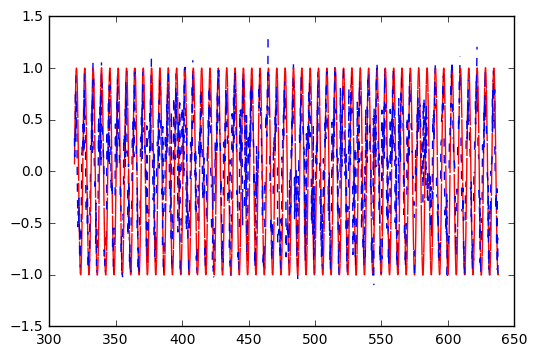

In [68]:
print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE) #用正弦拟合余弦
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.5, 1.5))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)
plt.show()